In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
sns.set_style('darkgrid')

In [2]:
links = {
    'comp_reserves' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/company_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'lic_regLicensees' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_petreg_licence_licencee&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'lic_overview' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'lic_licensees' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'lic_operators' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_oper_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'lic_workObligs' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_task&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'baa_licensees' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/bsns_arr_area_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'field_overview' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'field_inplaceVol' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_in_place_volumes&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'strat_wellbores' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'strat_cores' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore_core&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'well_explCurrent' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_current_year&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'well_expl10years' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_last_10_years&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'well_allLong' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'disc_overview' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
    'disc_resources' : 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en',
}

# load csv file into DataFrame and convert date columns to datetime objects

def load(key):

    df = pd.read_csv(links[key])

    for column in df.columns:
        if 'date' in column.lower():
            df[column] = pd.to_datetime(df[column], format='%d.%m.%Y')
        elif 'year' in column.lower():
            try:
                df[column] = pd.to_datetime(df[column], format='%Y')
            except ValueError as err:
                print(err)
                
    return df




# Drilling Results: Current year

In [3]:
link_key = 'well_explCurrent'
df = load(link_key)

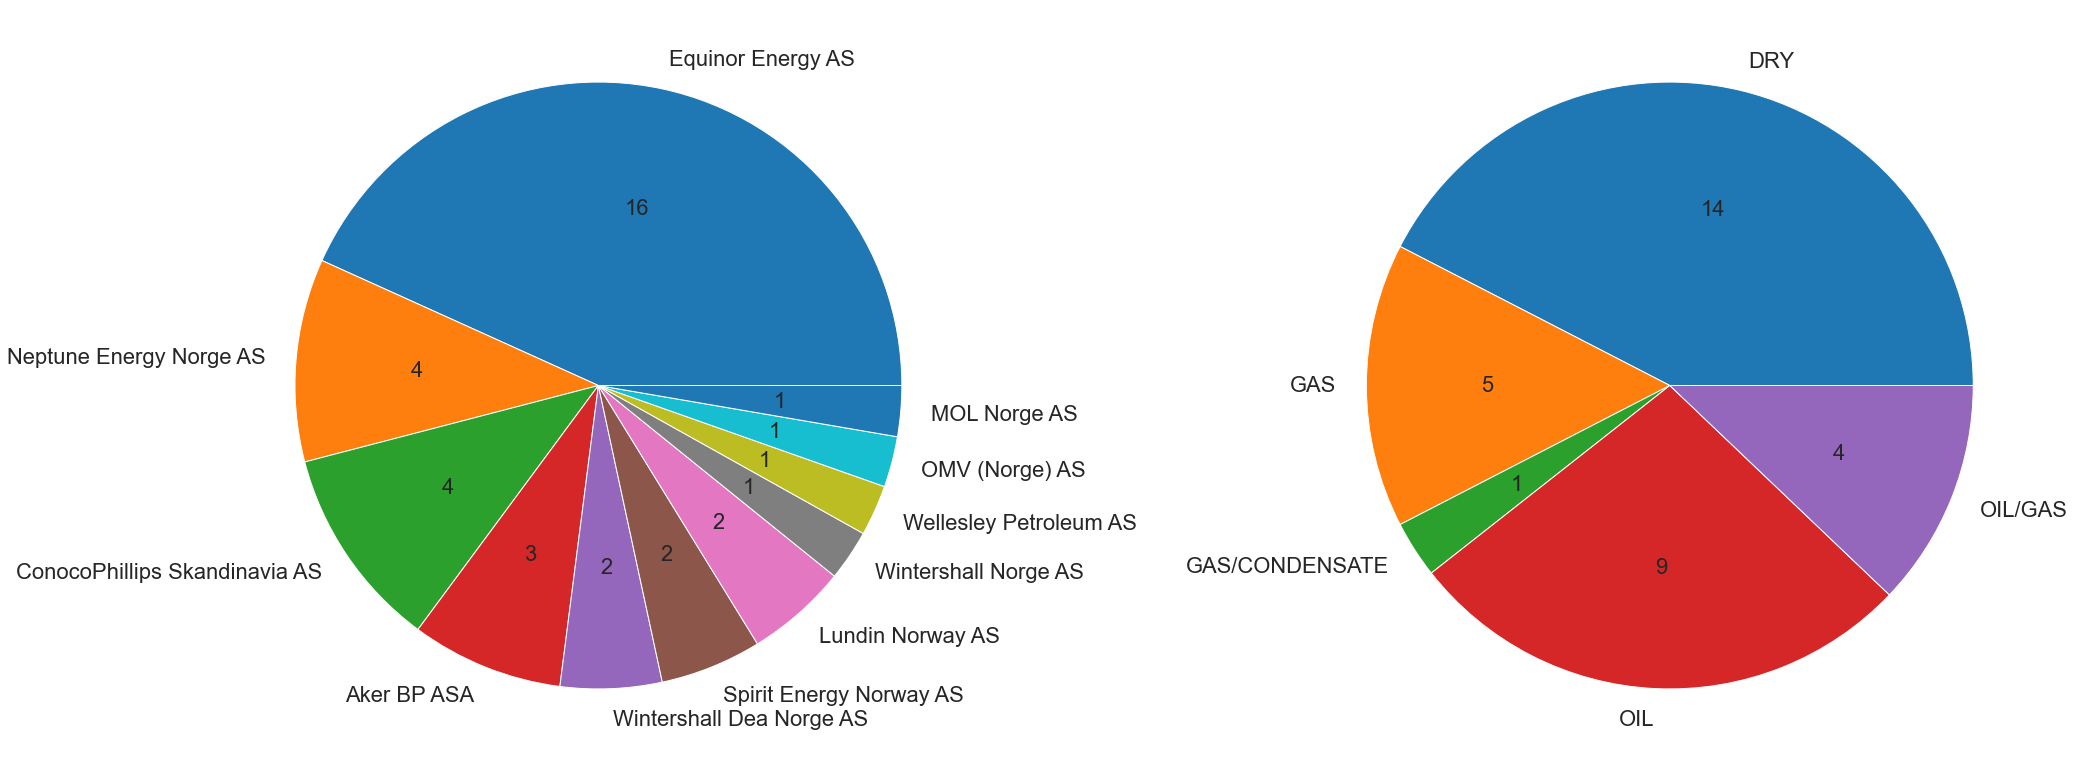

In [4]:
def abs_val_op(val):
    a  = int(np.round(val/100.*(df.groupby('wlbDrillingOperator').size()).sum(), 0))
    return a

def abs_val_hc(val):
    a  = int(np.round(val/100.*(df.groupby('wlbContent').size()).sum(), 0))
    return a

fig, ax = plt.subplots(1,2, figsize=(30,15))

data0 = df.groupby('wlbDrillingOperator').size().sort_values(ascending=False)
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 22})

data1 = df.groupby('wlbContent').size()
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 22})

fig.tight_layout(pad=5.0)

plt.savefig("./figures/drilling_current.png")

plt.show()

# Drilling Results: Previous 10 years

In [5]:
link_key = 'well_expl10years'
df = load(link_key)

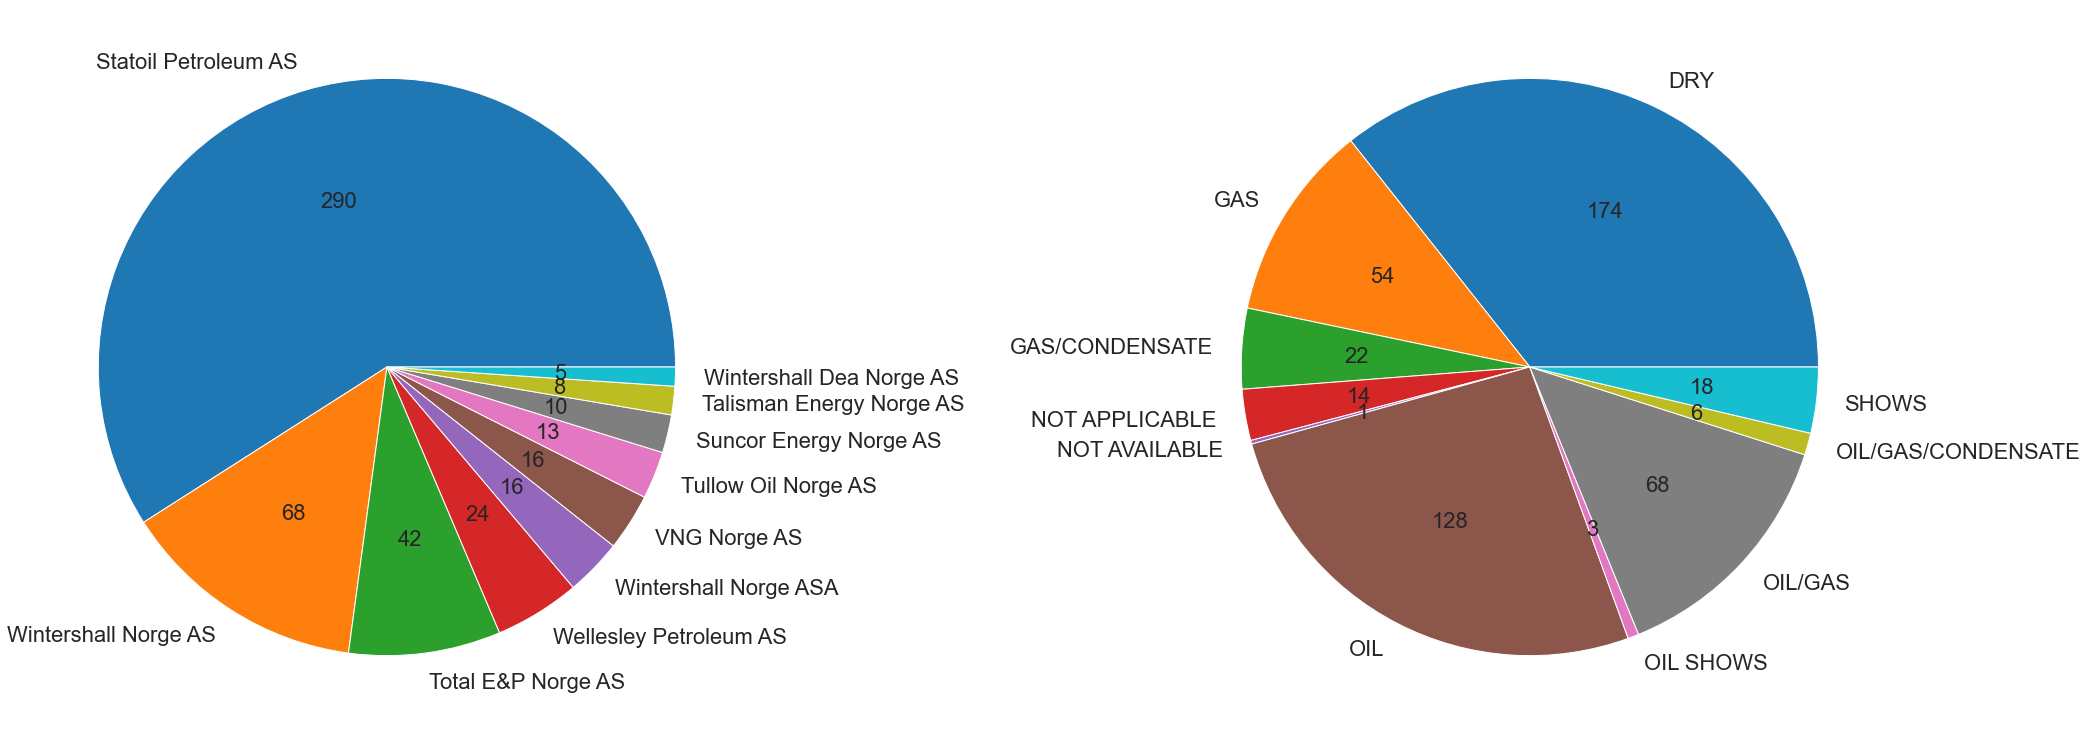

In [6]:
# Display top ten exploration drilling companies over past 10 years.
# Display well results for past 10 years

fig, ax = plt.subplots(1,2, figsize=(30,15))

data0 = df.groupby('wlbDrillingOperator').size().tail(10).sort_values(ascending=False)
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 22})

data1 = df.groupby('wlbContent').size()
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 22})

fig.tight_layout(pad=5.0)

plt.savefig("./figures/drilling_10.png")

plt.show()

# Drilling Results: All

In [7]:
link_key = 'well_allLong'
df = load(link_key)

time data '0' does not match format '%Y' (match)
time data '0' does not match format '%Y' (match)


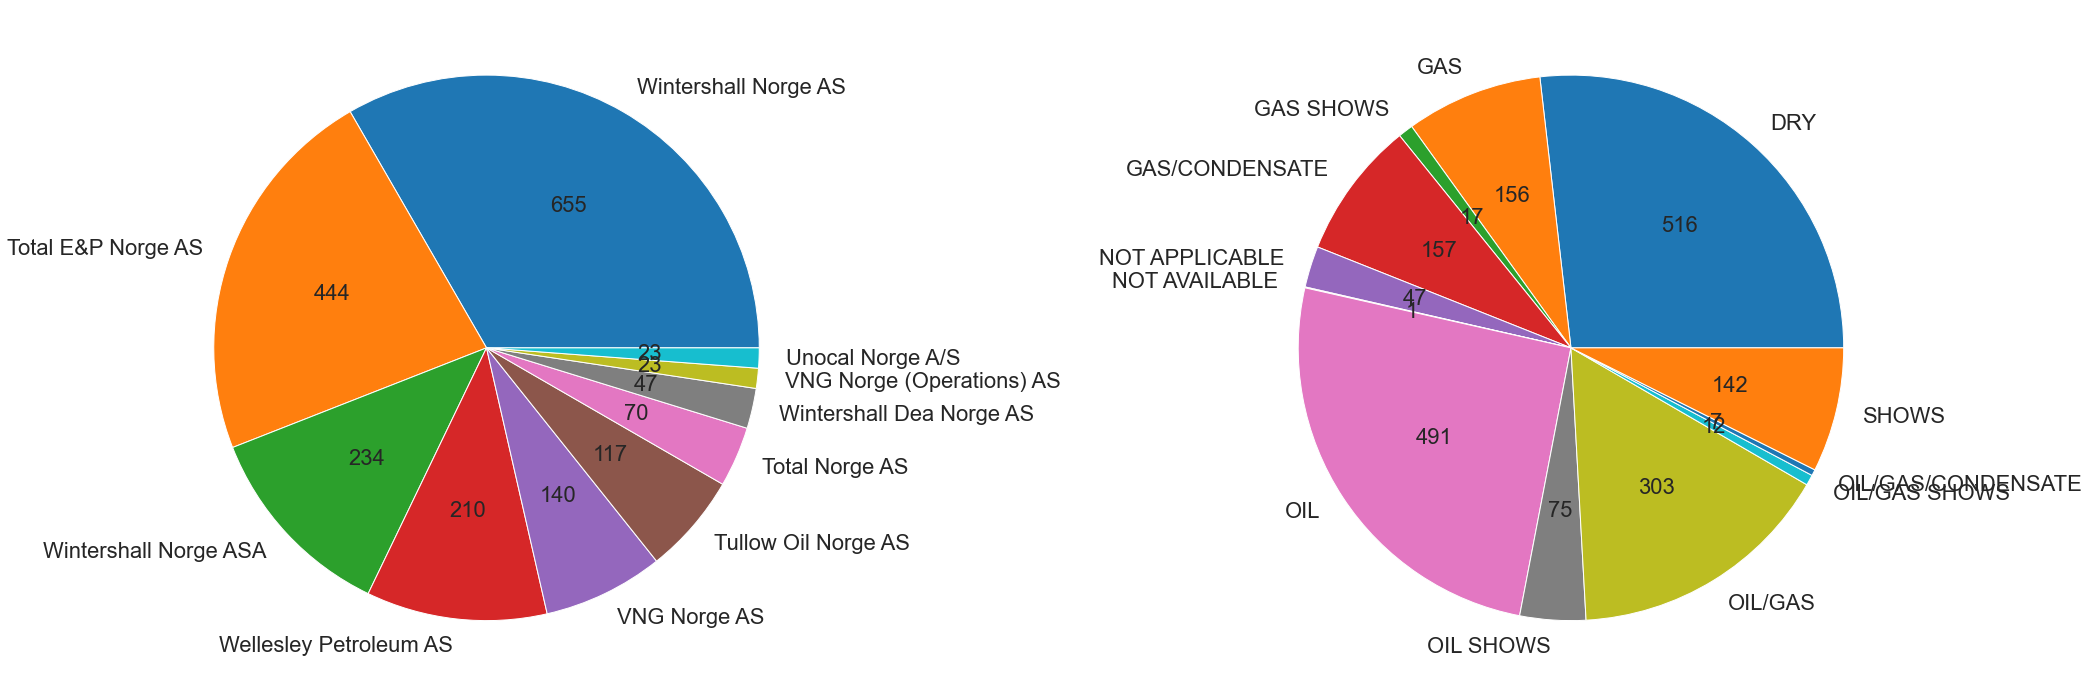

In [8]:
# Display top ten exploration drilling companies.
# Display well results

fig, ax = plt.subplots(1,2, figsize=(30,15))

data0 = df.groupby('wlbDrillingOperator').size().tail(10).sort_values(ascending=False)
ax[0].pie(data0, labels=data0.index, autopct=abs_val_op, textprops={'fontsize': 22})

data1 = df.groupby('wlbContent').size()
ax[1].pie(data1, labels=data1.index, autopct=abs_val_hc, textprops={'fontsize': 22})

fig.tight_layout(pad=5.0)

plt.savefig("./figures/drilling_all.png")

plt.show()

In [9]:
df = df.set_index('wlbEntryDate')
df['well_count'] = 1

wellcount_year = df['well_count'].resample('Y').sum()

wellcount_year.index = wellcount_year.index.strftime('%Y')

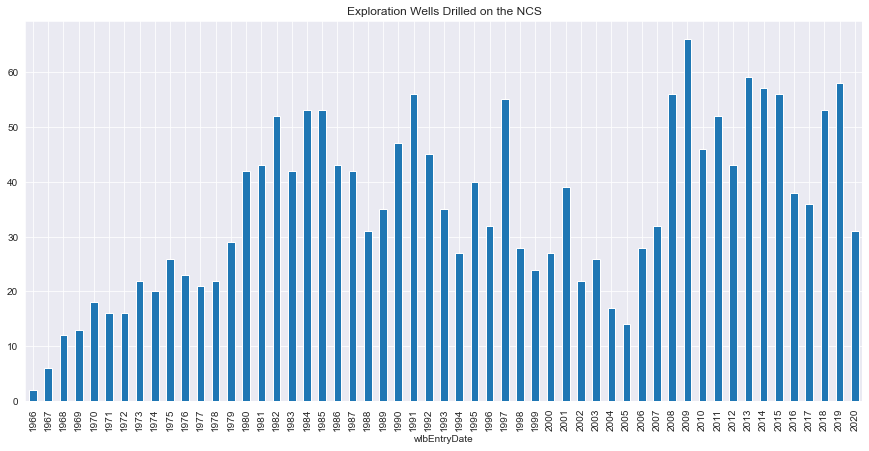

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
wellcount_year.plot(ax=ax, kind='bar', title='Exploration Wells Drilled on the NCS')
plt.savefig("./figures/expl_yearly_drill.png")
plt.show()

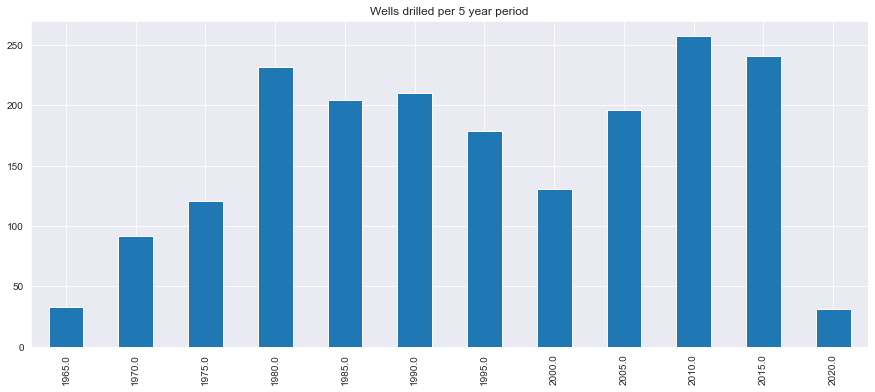

In [11]:
df.groupby(lambda x: (x.year//5)*5).count()['wlbWellboreName'].plot(kind='bar',
                                                                    figsize=(15,6),
                                                                    title='Wells drilled per 5 year period',)
plt.savefig("./figures/expl_5yearly_drill.png")
plt.show()

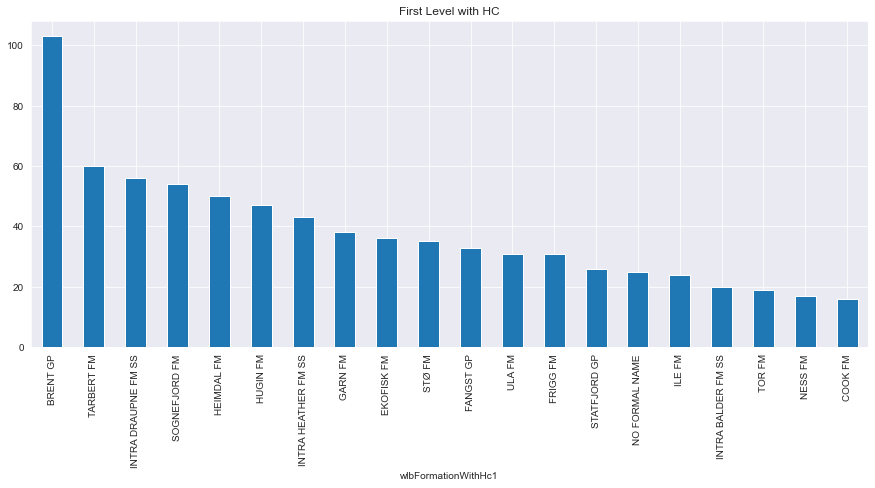

In [12]:
df.groupby('wlbFormationWithHc1').size().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                          figsize=(15,6),
                                                                                   title='First Level with HC')
plt.savefig("./figures/first_level_hc.png")
plt.show()

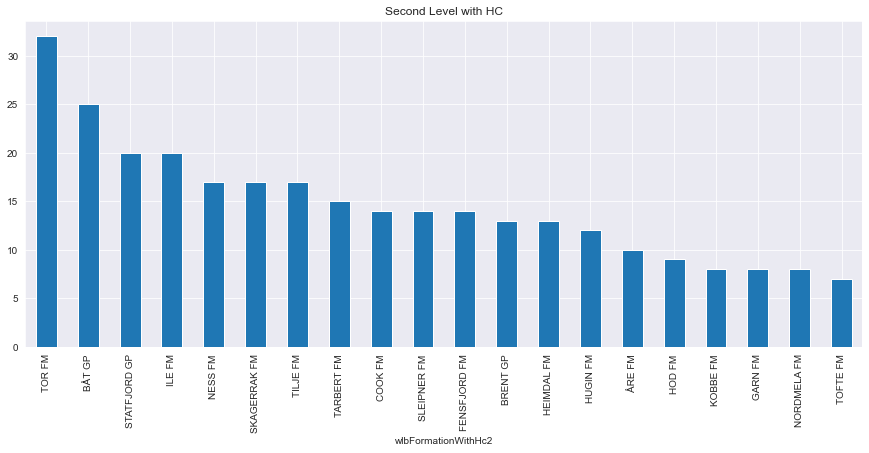

In [13]:
df.groupby('wlbFormationWithHc2').size().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                          figsize=(15,6),
                                                                                   title='Second Level with HC')
plt.savefig("./figures/second_level_hc.png")
plt.show()

# Discovery: Overview

In [44]:
link_key = 'disc_overview'
df = load(link_key)

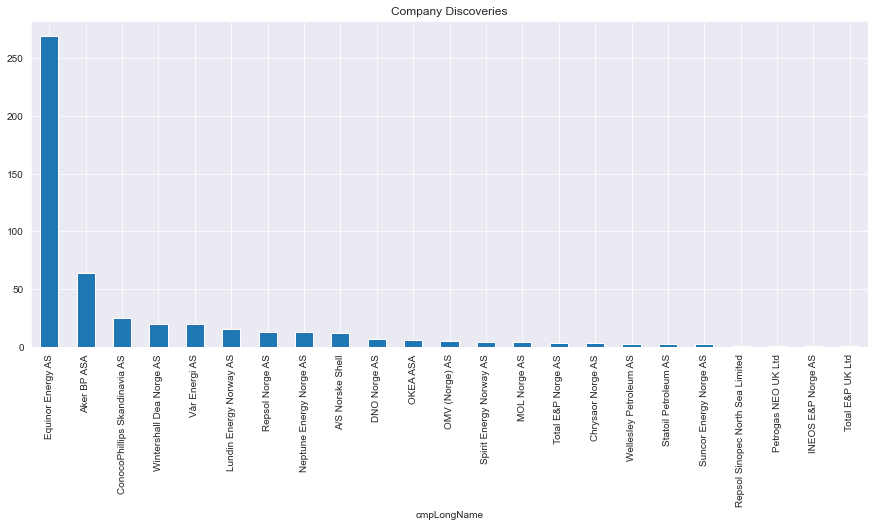

In [45]:
df.groupby('cmpLongName').size().sort_values(ascending=False).plot(kind='bar',
                                                                   figsize=(15,6),
                                                                  title='Company Discoveries')
plt.savefig("./figures/discovery_ov.png")
plt.show()

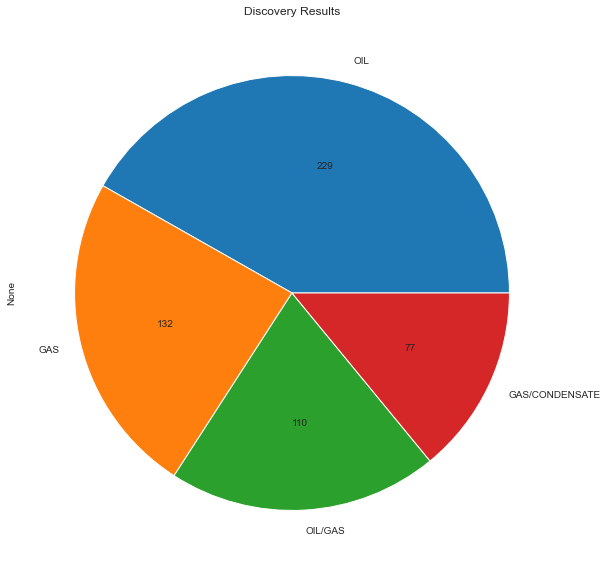

In [49]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

df.groupby('dscHcType').size().sort_values(ascending=False).plot(kind='pie',
                                                                  figsize=(10,10),
                                                                  title='Discovery Results',
                                                                autopct=absolute_value)
plt.savefig("./figures/discovery_results.png")
plt.show()

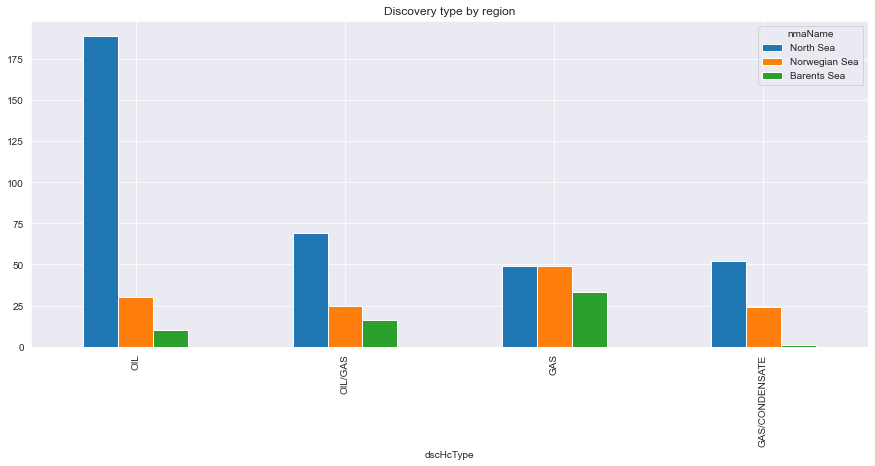

In [17]:
disc_areas = df.groupby(['dscHcType', 'nmaName']).size().unstack()

disc_areas = disc_areas.reindex(["OIL",  "OIL/GAS", "GAS","GAS/CONDENSATE"])
disc_areas = disc_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]

disc_areas.plot(kind='bar',
               figsize=(15,6),
               title='Discovery type by region')

plt.savefig("./figures/discovery_results_type.png")
plt.show()

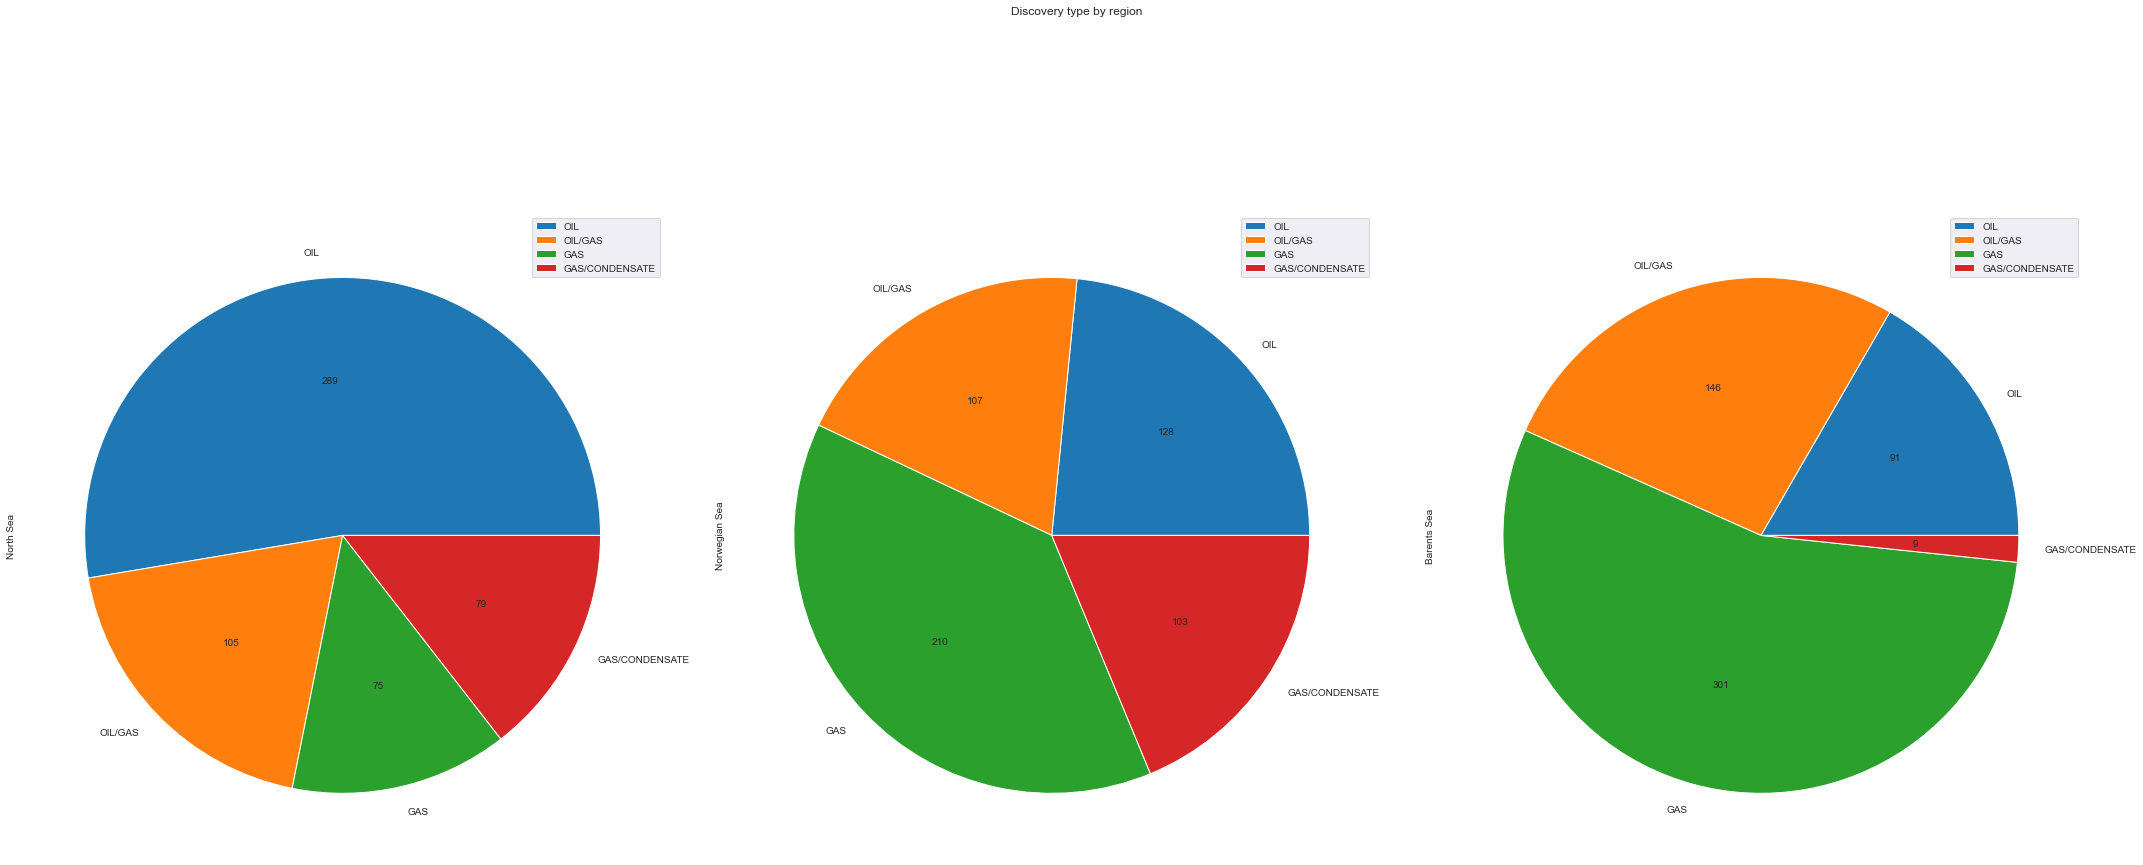

In [18]:
def absolute_value(val):
    a  = int(np.round(val/100.*(df.groupby('dscHcType').size()).sum(), 0))
    return a

disc_areas.plot(kind='pie',
                subplots=True,
               figsize=(30,15),
               title='Discovery type by region',
                autopct=absolute_value,
               legend=True)

plt.tight_layout()
plt.savefig("./figures/discovery_results_type_region.png")
plt.show()

# Discovery: Resources

In [19]:
link_key = 'disc_resources'
df = load(link_key)

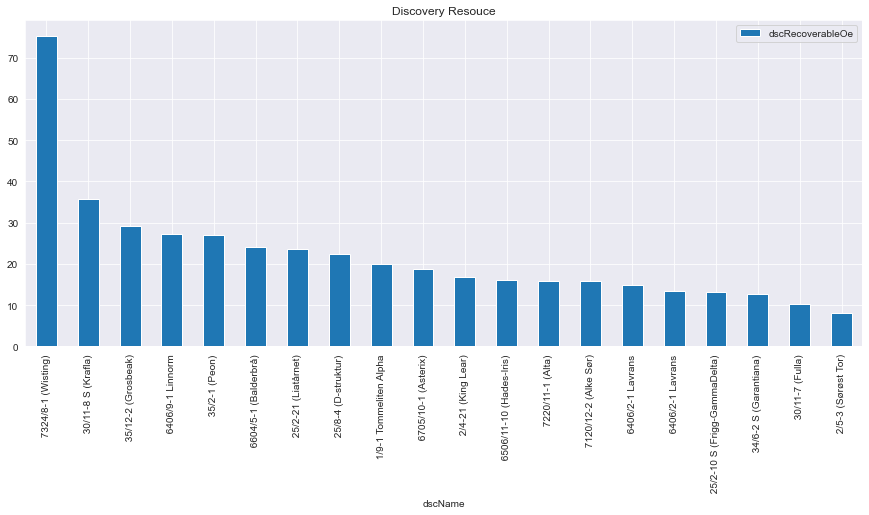

In [20]:
df.sort_values(by='dscRecoverableOe',ascending=False).head(20).plot(kind='bar',
                                                          y='dscRecoverableOe',
                                                          x='dscName',
                                                          figsize=(15,6),
                                                                   title='Discovery Resouce')
plt.savefig("./figures/discovery_resources.png")
plt.show()

# Field: Overview

In [21]:
link_key = 'field_overview'
df = load(link_key)

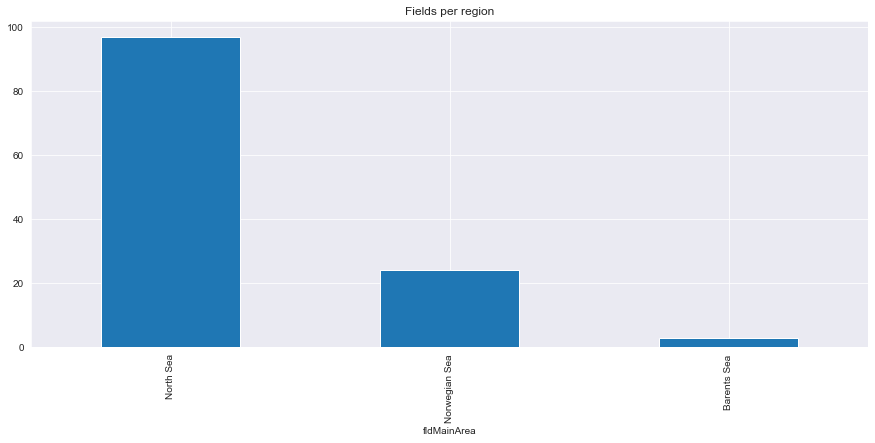

In [22]:
df.groupby('fldMainArea').size().sort_values(ascending=False).plot(kind='bar',
                                                                   figsize=(15,6),
                                                                  title='Fields per region')
plt.savefig("./figures/fields_by_region.png")
plt.show()

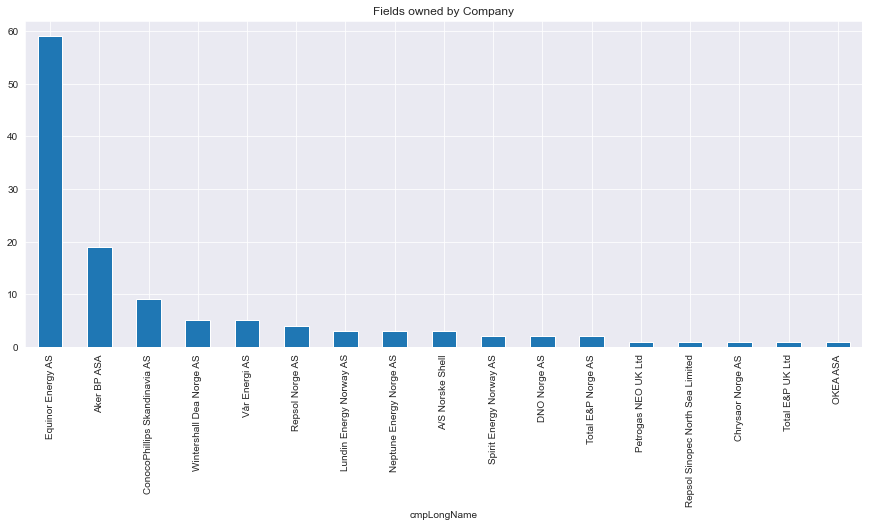

In [23]:
df.groupby('cmpLongName').size().sort_values(ascending=False).plot(kind='bar',
                                                                   figsize=(15,6),
                                                                  title='Fields owned by Company')
plt.savefig("./figures/fields_by_company.png")
plt.show()

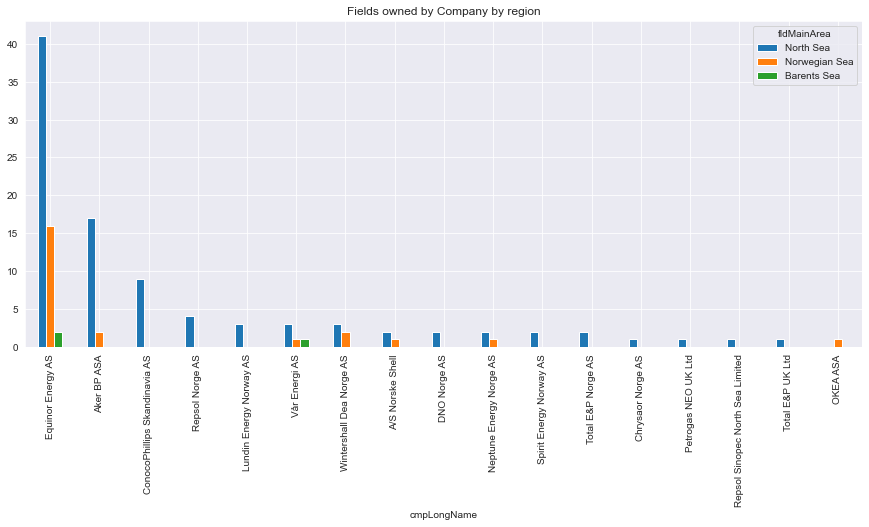

In [24]:
field_areas = df.groupby(['cmpLongName', 'fldMainArea']).size().unstack()
field_areas = field_areas[['North Sea', 'Norwegian Sea', 'Barents Sea']]
field_areas.sort_values(by='North Sea', ascending=False).plot(kind='bar',
                                                             figsize=(15,6),
                                                             title='Fields owned by Company by region')
plt.savefig("./figures/fields_by_company_by_region.png")
plt.show()

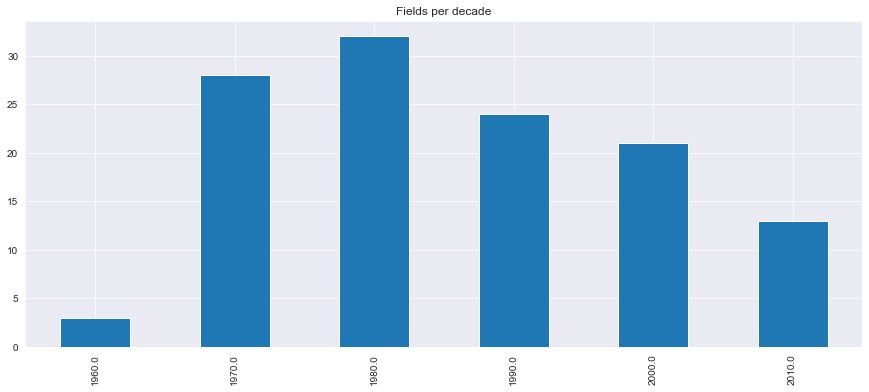

In [25]:
df.set_index('wlbCompletionDate').groupby(lambda x: (x.year//10)*10).count()['fldName'].plot(kind='bar',
                                                                                            figsize=(15,6),
                                                                                            title='Fields per decade')
plt.savefig("./figures/fields_by_decade.png")
plt.show()

# Stratigraphy: Wellbore

In [26]:
link_key = 'strat_wellbores'
df = load(link_key)

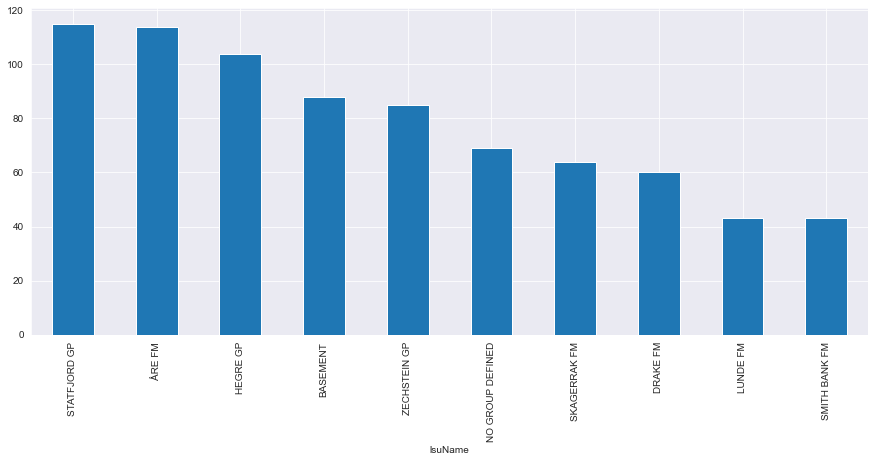

In [27]:
# Plot most common TD Group / Formation
# Filter out all but deepest Stratigrapy for every well
df = df.loc[df.groupby('wlbName').lsuTopDepth.idxmax(),:]

df.groupby('lsuName').count()['wlbName'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15,6))
plt.savefig("./figures/stratigraphy_by_TD.png")
plt.show()

# Stratigraphy: Cores

In [28]:
link_key = 'strat_cores'
df = load(link_key)

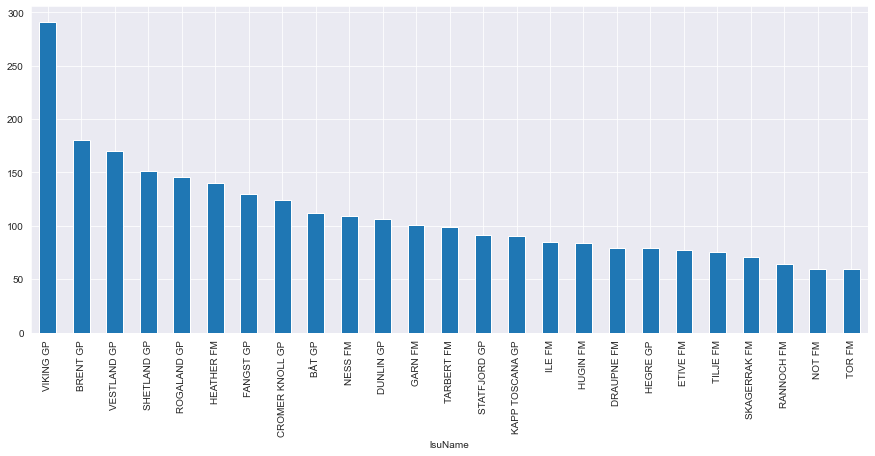

In [29]:
# Plot number of cores in each Formation / Group
df.groupby('lsuName').size().sort_values(ascending=False).head(25).plot(kind='bar',
                                                              figsize=(15,6),)
plt.savefig("./figures/core_by_formation.png")
plt.show()

# Company: Reserves

In [30]:
link_key = 'comp_reserves'
df = load(link_key)

In [31]:
df = df.groupby('cmpLongName').sum().sort_values(ascending=False, by='cmpRemainingOE')

In [32]:
# company_reserves = df['cmpRemainingOE'].sort_values(ascending=False).index
company_list = df['cmpRemainingOE'].index
print(f"Number of companies reporting Reserves: {len(company_list)}")

Number of companies reporting Reserves: 32


In [33]:
reserves_oe = df['cmpRemainingOE']

In [34]:
reserves = df.reset_index().sort_values(by='cmpRemainingOE', ascending=False)

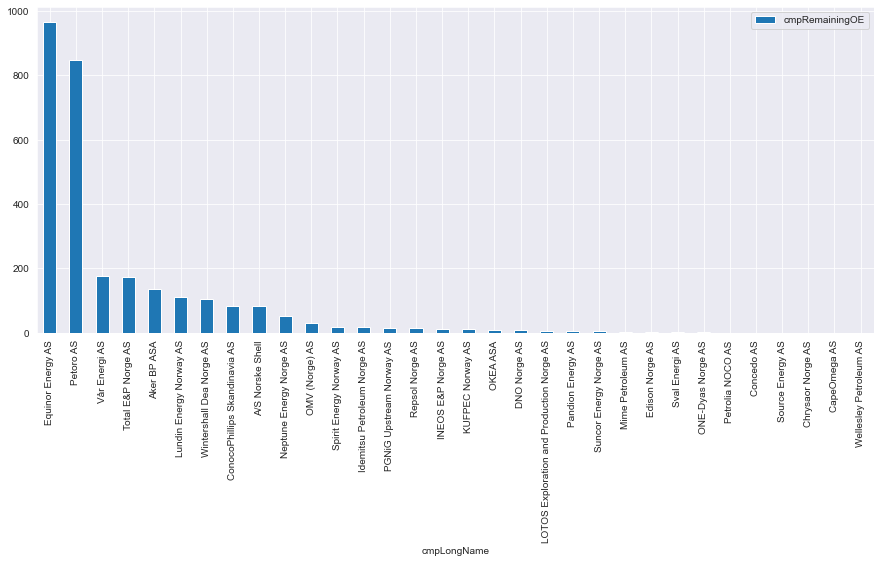

In [35]:
df.reset_index().sort_values(by='cmpRemainingOE', ascending=False).plot(kind='bar',
                                                                        x='cmpLongName',
                                                                        y='cmpRemainingOE',
                                                                       figsize=(15,6))
plt.savefig("./figures/reserves_by_company.png")
plt.show()

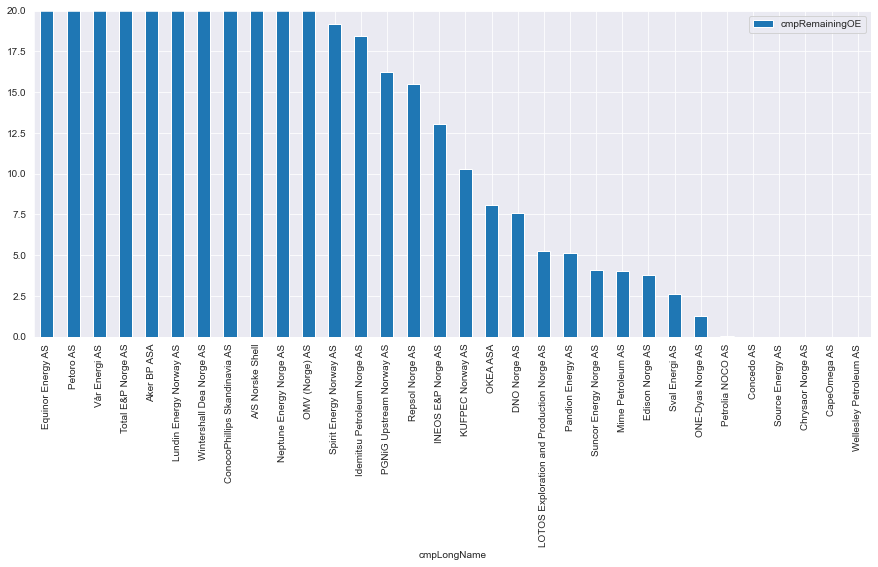

In [36]:
df.reset_index().sort_values(by='cmpRemainingOE', ascending=False).plot(kind='bar',
                                                                        x='cmpLongName',
                                                                        y='cmpRemainingOE',
                                                                        ylim = [0, 20],
                                                                       figsize=(15,6))
plt.savefig("./figures/reserves_by_company_zoom.png")
plt.show()

# Licences: Registered

In [37]:
link_key = 'lic_regLicensees'
df = load(link_key)

In [38]:
print(list(enumerate(company_list, start=1)))
select = 20 # int(input("Select company: "))

compare_list = []
if select == 1:
    compare_list.extend([company_list[select-1], company_list[select], company_list[select+1]])
elif select == len(reserves):
    compare_list.extend([company_list[select-1], company_list[select-2], company_list[select-3]])
else:
    compare_list.extend([company_list[select-1], company_list[select-2], company_list[select]])

[(1, 'Equinor Energy AS'), (2, 'Petoro AS'), (3, 'Vår Energi AS'), (4, 'Total E&P Norge AS'), (5, 'Aker BP ASA'), (6, 'Lundin Energy Norway AS'), (7, 'Wintershall Dea Norge AS'), (8, 'ConocoPhillips Skandinavia AS'), (9, 'A/S Norske Shell'), (10, 'Neptune Energy Norge AS'), (11, 'OMV (Norge) AS'), (12, 'Spirit Energy Norway AS'), (13, 'Idemitsu Petroleum Norge AS'), (14, 'PGNiG Upstream Norway AS'), (15, 'Repsol Norge AS'), (16, 'INEOS E&P Norge AS'), (17, 'KUFPEC Norway AS'), (18, 'OKEA ASA'), (19, 'DNO Norge AS'), (20, 'LOTOS Exploration and Production Norge AS'), (21, 'Pandion Energy AS'), (22, 'Suncor Energy Norge AS'), (23, 'Mime Petroleum AS'), (24, 'Edison Norge AS'), (25, 'Sval Energi AS'), (26, 'ONE-Dyas Norge AS'), (27, 'Petrolia NOCO AS'), (28, 'Concedo AS'), (29, 'Source Energy AS'), (30, 'Chrysaor Norge AS'), (31, 'CapeOmega AS'), (32, 'Wellesley Petroleum AS')]


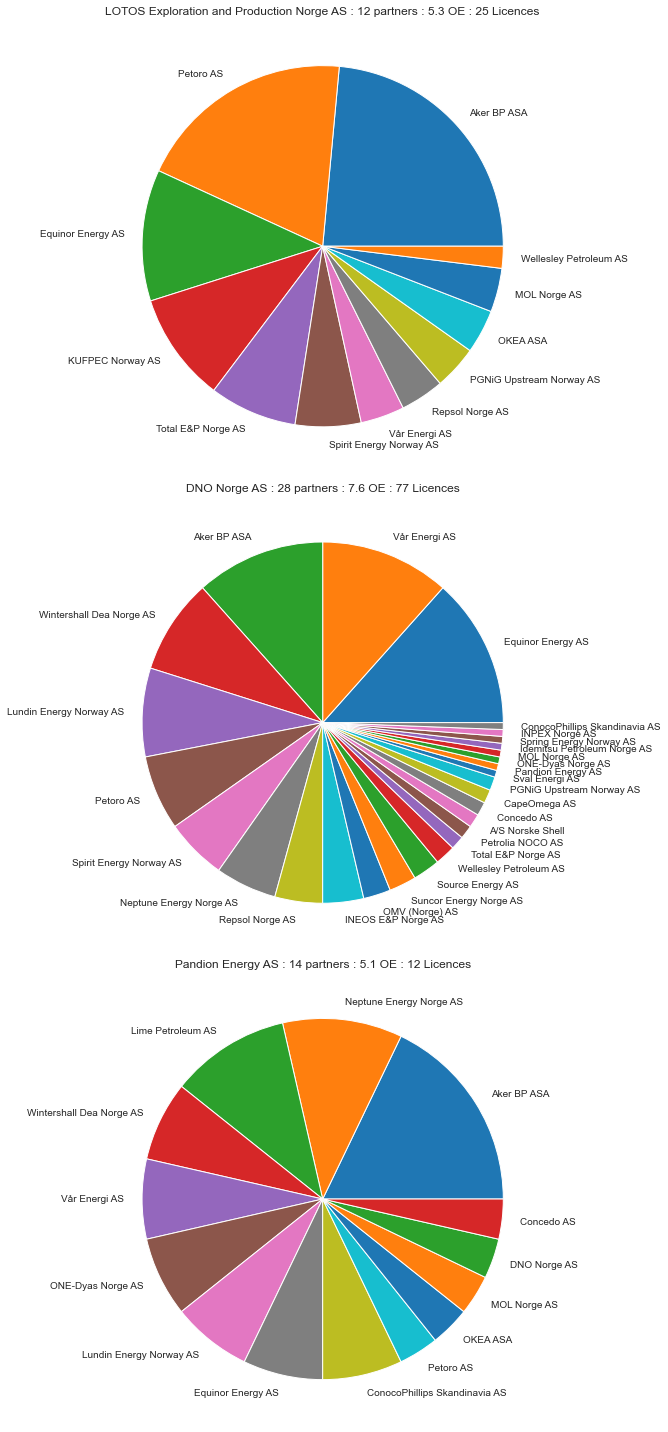

In [39]:
partners_compare = {}

for company in compare_list:
    # filter for each company and sort by held interest in licence
    df_company = df[df['cmpLongName']==company].sort_values(by='ptlLicenseeInterest', ascending=False)
    
    # Number of licences held
    num_licences = len(df_company)
        
    # create a list of all licences for each company
    licences = list(df_company['ptlName'])

    licensees = pd.DataFrame()
    for licence in licences:
        # for each licence held by each company create df of all companies in the licence
        licensees = licensees.append(df[df['ptlName']==licence])
    
    # now create df of only partner companies
    
    partners = licensees[licensees['cmpLongName']!=company]
    partners = partners.groupby('cmpLongName').count().sort_values(by='ptlName', ascending=False)
    partners = partners['ptlName']
    partners = partners.sort_values(ascending=False)
    for partner in partners:
        partners_compare[company] = partners

fig, ax = plt.subplots(len(list(partners_compare.keys())), 1, figsize=(10,20))

for i in range(len(list(partners_compare.keys()))):
    
    data = list(partners_compare.values())[i]
    
    ax[i].pie(data, labels=partners_compare[compare_list[i]].index)
    
    ax[i].set_title(f"{compare_list[i]} : {len(list(partners_compare.values())[i])} partners : {reserves_oe[list(partners_compare.keys())[i]]:.1f} OE : {df[df['cmpLongName']==compare_list[i]].shape[0]} Licences")


plt.tight_layout()
plt.savefig("./figures/company_partner_comparison_by_reserves.png")
plt.show()

# Licence: Operators

In [40]:
link_key = 'lic_operators'
df = load(link_key)

In [41]:
df[df['cmpLongName'] == 'LOTOS Exploration and Production Norge AS']

,prlName,prlOperDateValidFrom,prlOperDateValidTo,cmpLongName,prlNpdidLicence,cmpNpdidCompany,prlOperDateUpdated,DatesyncNPD
210,035 B,2014-01-16,2015-12-31,LOTOS Exploration and Production Norge AS,5105684,5064434,2019-10-02,2020-12-30
1895,362,2014-01-16,2015-12-06,LOTOS Exploration and Production Norge AS,3810565,5064434,2019-10-02,2020-12-30
2142,455,2011-07-01,2014-03-01,LOTOS Exploration and Production Norge AS,4909816,5064434,2019-10-02,2020-12-30
2243,498,2009-01-23,2015-01-23,LOTOS Exploration and Production Norge AS,5106134,5064434,2019-10-02,2020-12-30
2244,498 B,2014-02-07,2016-02-07,LOTOS Exploration and Production Norge AS,24214458,5064434,2019-10-02,2020-12-30
2256,503,2009-01-23,2015-11-07,LOTOS Exploration and Production Norge AS,5106405,5064434,2019-10-02,2020-12-30
2257,503 B,2011-02-04,2015-11-07,LOTOS Exploration and Production Norge AS,20107903,5064434,2019-10-02,2020-12-30
2258,503 C,2014-02-07,2015-10-07,LOTOS Exploration and Production Norge AS,24214483,5064434,2019-10-02,2020-12-30
2404,556,2010-02-19,2011-02-19,LOTOS Exploration and Production Norge AS,17654560,5064434,2019-10-02,2020-12-30
2865,797,2015-02-06,2017-02-06,LOTOS Exploration and Production Norge AS,25611033,5064434,2019-10-02,2020-12-30


# Licence: Work Obligations

In [42]:
link_key = 'lic_workObligs'
df = load(link_key)

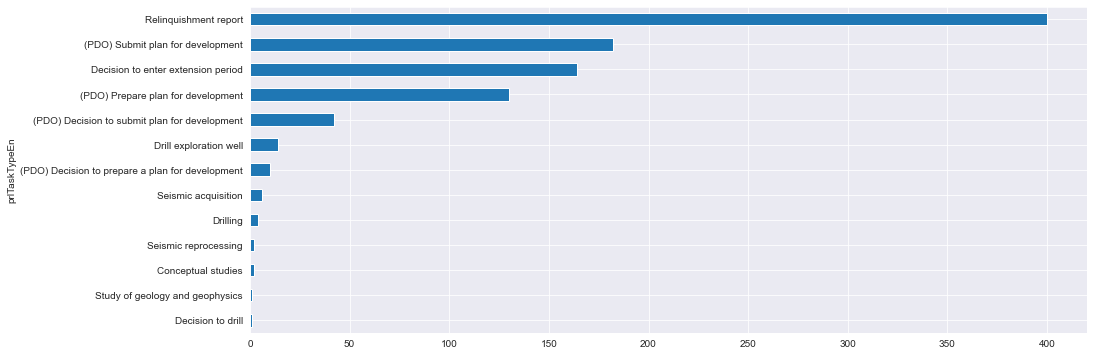

In [43]:
df = df.loc[df.groupby('prlName').prlTaskExpiryDate.idxmax(),:]

df.groupby('prlTaskTypeEn').size().sort_values().plot(kind='barh',
                                                                    figsize=(15,6))
plt.savefig("./figures/work_obligations.png")
plt.show()

# The End

# links to npd.no csv exports
company_reserves = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/company_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_regLicensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_petreg_licence_licencee&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_operators = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_oper_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
licence_workobligations = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/licence_task&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
baa_licensees = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/bsns_arr_area_licensee_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
field_inplacevolumes = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_in_place_volumes&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_wellbores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
stratigraphy_cores = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/strat_litho_wellbore_core&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_explorationcurrent = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_current_year&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_exploration10years = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_last_10_years&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
wellbore_alllong = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/wellbore_exploration_all&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_overview = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
discovery_resources = 'https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/discovery_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=en'
